Online news poplarity is a dataset from UCI Machine Learning Repository. 

The dataset contains 61 attributes and 39644 instances. The goal is to predict the number of shares of an article on social media.

Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

url: URL of the article (non-predictive)

timedelta: Days between the article publication and the dataset acquisition (non-predictive)

n_tokens_title: Number of words in the title

n_tokens_content: Number of words in the content

n_unique_tokens: Rate of unique words in the content

n_non_stop_words: Rate of non-stop words in the content

n_non_stop_unique_tokens: Rate of unique non-stop words in the content

num_hrefs: Number of links

num_self_hrefs: Number of links to other articles published by Mashable

num_imgs: Number of images

num_videos: Number of videos

average_token_length: Average length of the words in the content

num_keywords: Number of keywords in the metadata

data_channel_is_lifestyle: Is data channel 'Lifestyle'?

data_channel_is_entertainment: Is data channel 'Entertainment'?

data_channel_is_bus: Is data channel 'Business'?

data_channel_is_socmed: Is data channel 'Social Media'?

data_channel_is_tech: Is data channel 'Tech'?

data_channel_is_world: Is data channel 'World'?

kw_min_min: Worst keyword (min. shares)

kw_max_min: Worst keyword (max. shares)

kw_avg_min: Worst keyword (avg. shares)

kw_min_max: Best keyword (min. shares)

kw_max_max: Best keyword (max. shares)

kw_avg_max: Best keyword (avg. shares)

kw_min_avg: Avg. keyword (min. shares)

kw_max_avg: Avg. keyword (max. shares)

kw_avg_avg: Avg. keyword (avg. shares)

self_reference_min_shares: Min. shares of referenced articles in Mashable

self_reference_max_shares: Max. shares of referenced articles in Mashable

self_reference_avg_sharess: Avg. shares of referenced articles in Mashable

weekday_is_monday: Was the article published on a Monday?

weekday_is_tuesday: Was the article published on a Tuesday?

weekday_is_wednesday: Was the article published on a Wednesday?

weekday_is_thursday: Was the article published on a Thursday?

weekday_is_friday: Was the article published on a Friday?

weekday_is_saturday: Was the article published on a Saturday?

weekday_is_sunday: Was the article published on a Sunday?

is_weekend: Was the article published on the weekend?

LDA_00: Closeness to LDA topic 0

LDA_01: Closeness to LDA topic 1

LDA_02: Closeness to LDA topic 2

LDA_03: Closeness to LDA topic 3

LDA_04: Closeness to LDA topic 4

global_subjectivity: Text subjectivity

global_sentiment_polarity: Text sentiment polarity

global_rate_positive_words: Rate of positive words in the content

global_rate_negative_words: Rate of negative words in the content

rate_positive_words: Rate of positive words among non-neutral tokens

rate_negative_words: Rate of negative words among non-neutral tokens

avg_positive_polarity: Avg. polarity of positive words

min_positive_polarity: Min. polarity of positive words

max_positive_polarity: Max. polarity of positive words

avg_negative_polarity: Avg. polarity of negative words

min_negative_polarity: Min. polarity of negative words

max_negative_polarity: Max. polarity of negative words

title_subjectivity: Title subjectivity

title_sentiment_polarity: Title polarity

abs_title_subjectivity: Absolute subjectivity level

abs_title_sentiment_polarity: Absolute polarity level

shares: Number of shares (target)


 This is a reasonable assumption as the no.of shares is a direct measure of the number of people who have read the article and found it interesting enough to share it.

Importing the necessary libraries and the dataset:

```python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
# uploading dataset
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = df.columns.str.replace(' ', '')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Drop the non-predictive variables

In [3]:
shares = df['shares']
df.drop(labels=['url', 'timedelta'], axis=1, inplace=True)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [4]:
shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [44]:
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


Remove articles with no content

In [45]:
df = df[df['n_tokens_content']!=0]

There are no duplicates and no missing values in the dataset.

Exploratory data analysis 

In [5]:
# for column in df.columns:
#     if column != 'shares':
#         plt.figure(figsize=(15,7.5))
        
#         plt.scatter(df[str(column)], shares, alpha=0.4)
#         plt.xlabel(column)
#         plt.ylabel('shares')
#         plt.show()

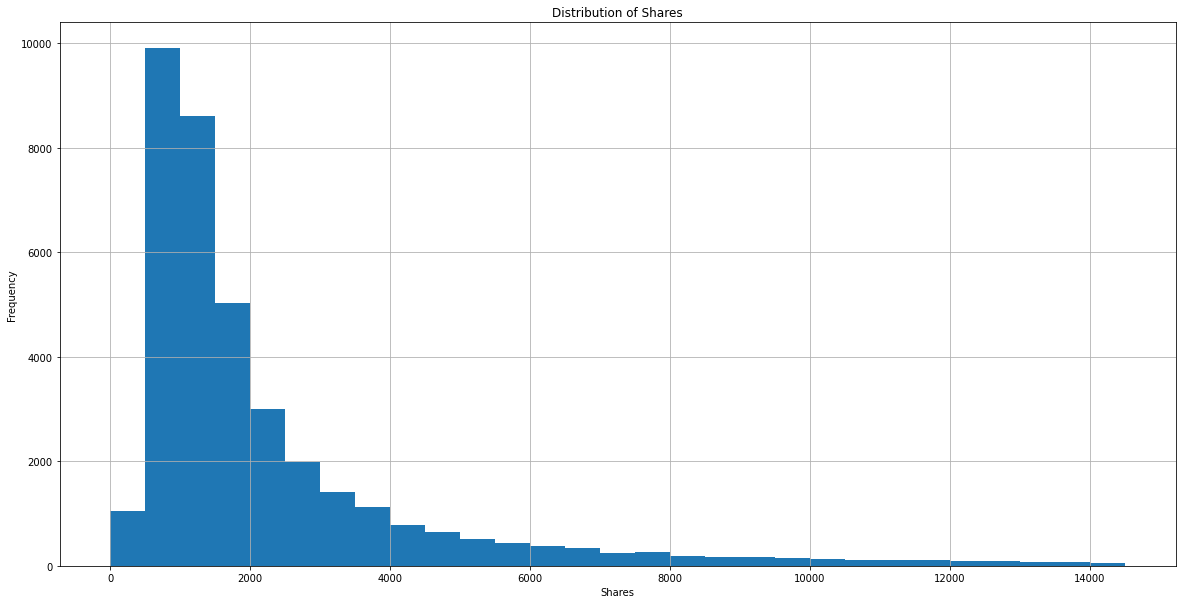

The median number of shares is 1400.0
The mean number of shares is 3355.3603983048642


In [59]:
n_shares = np.arange(0, 15000, 500)

df['shares'].hist(bins = n_shares, figsize = (20, 10))
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

print('The median number of shares is', df['shares'].median())
print('The mean number of shares is', df['shares'].mean())

Most of the articles are shared less than 1500 times. The distribution of the number of shares is skewed to the right. The median is 1400 shares, while the mean is 3395 shares. The maximum number of shares is 843300 shares.

<AxesSubplot:>

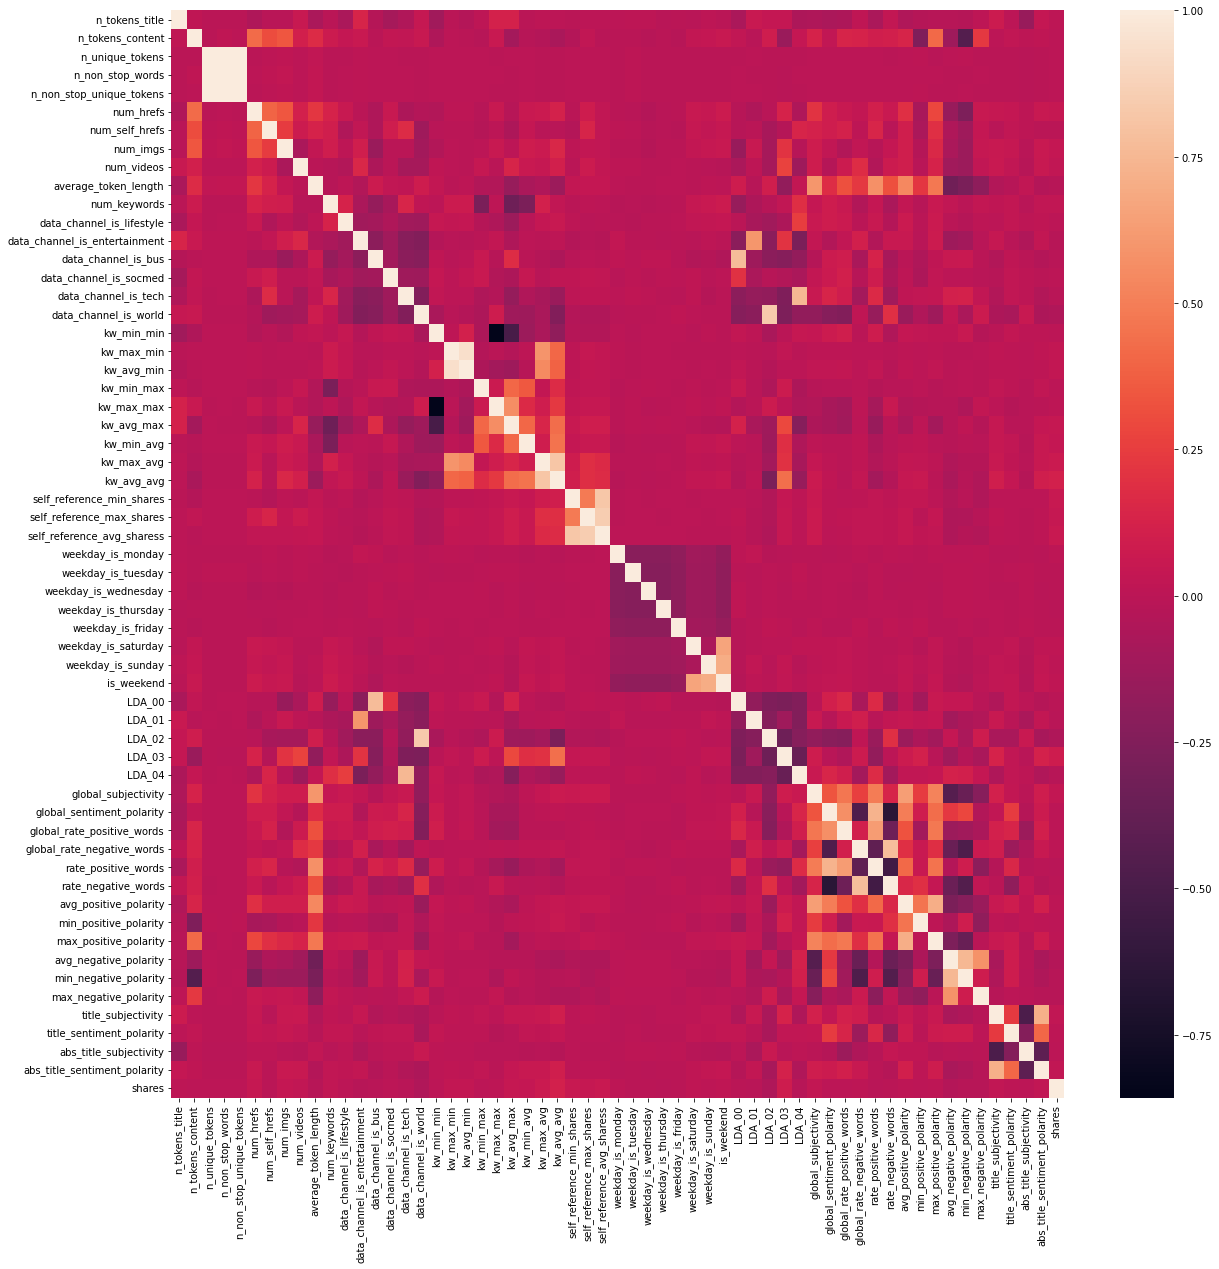

In [6]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr()) 

Let's first see what is the average shares for each weekday.

weekday_is_monday


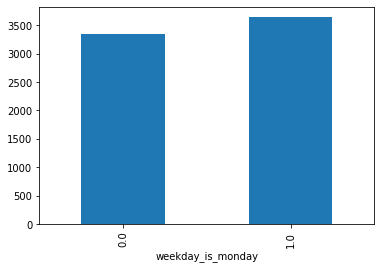

weekday_is_tuesday


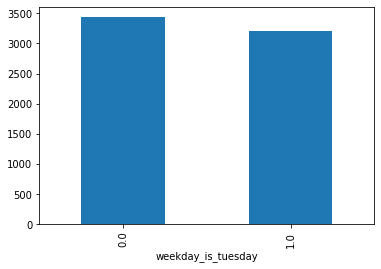

weekday_is_wednesday


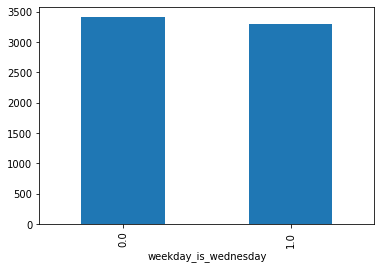

weekday_is_thursday


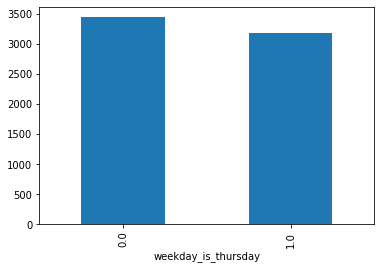

weekday_is_friday


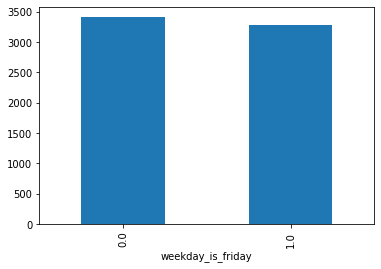

weekday_is_saturday


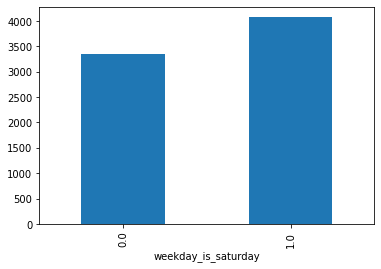

weekday_is_sunday


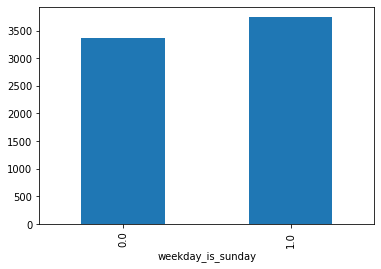

In [7]:
# for each weekday, the number of articles published and the average number of shares

for i in range(29,36):
    print(df.columns[i])
    (df.groupby(df.columns[i])['shares'].mean()).plot(kind='bar')
    plt.show()   
#they don't seem to have a strong correlation barring saturday



<AxesSubplot:xlabel='is_weekend'>

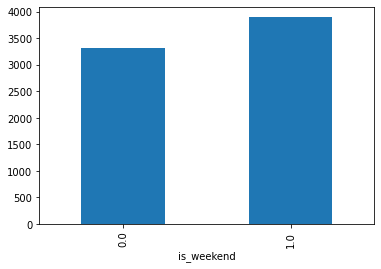

In [8]:
#lets check if there is any correlation with is_weekend and shares

df.groupby('is_weekend')['shares'].mean().plot(kind='bar')
#weekend the shares are a bit more

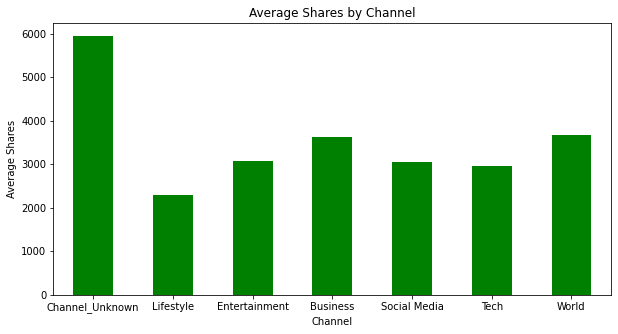

In [43]:
#checking by data channel
data_channels = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']

shares_by_channel = df.groupby(data_channels)['shares'].mean()
channels_names = ['Channel_Unknown','Lifestyle','Entertainment','Business','Social Media','Tech','World']

shares_by_channel.plot(kind='bar',figsize=(10,5),title='Average Shares by Channel',color='green')
plt.xticks(np.arange(7),channels_names,rotation=0)
plt.xlabel('Channel')
plt.ylabel('Average Shares')
plt.title('Average Shares by Channel')
plt.show()









As we can see Business an Tech are the most popular topics. The least popular topics are Lifestyle and Entertainment.

In [9]:
feature_data = df.drop( 'shares',axis=1)
target_data = df['shares']




<AxesSubplot:title={'center':'Correalation with response variable'}>

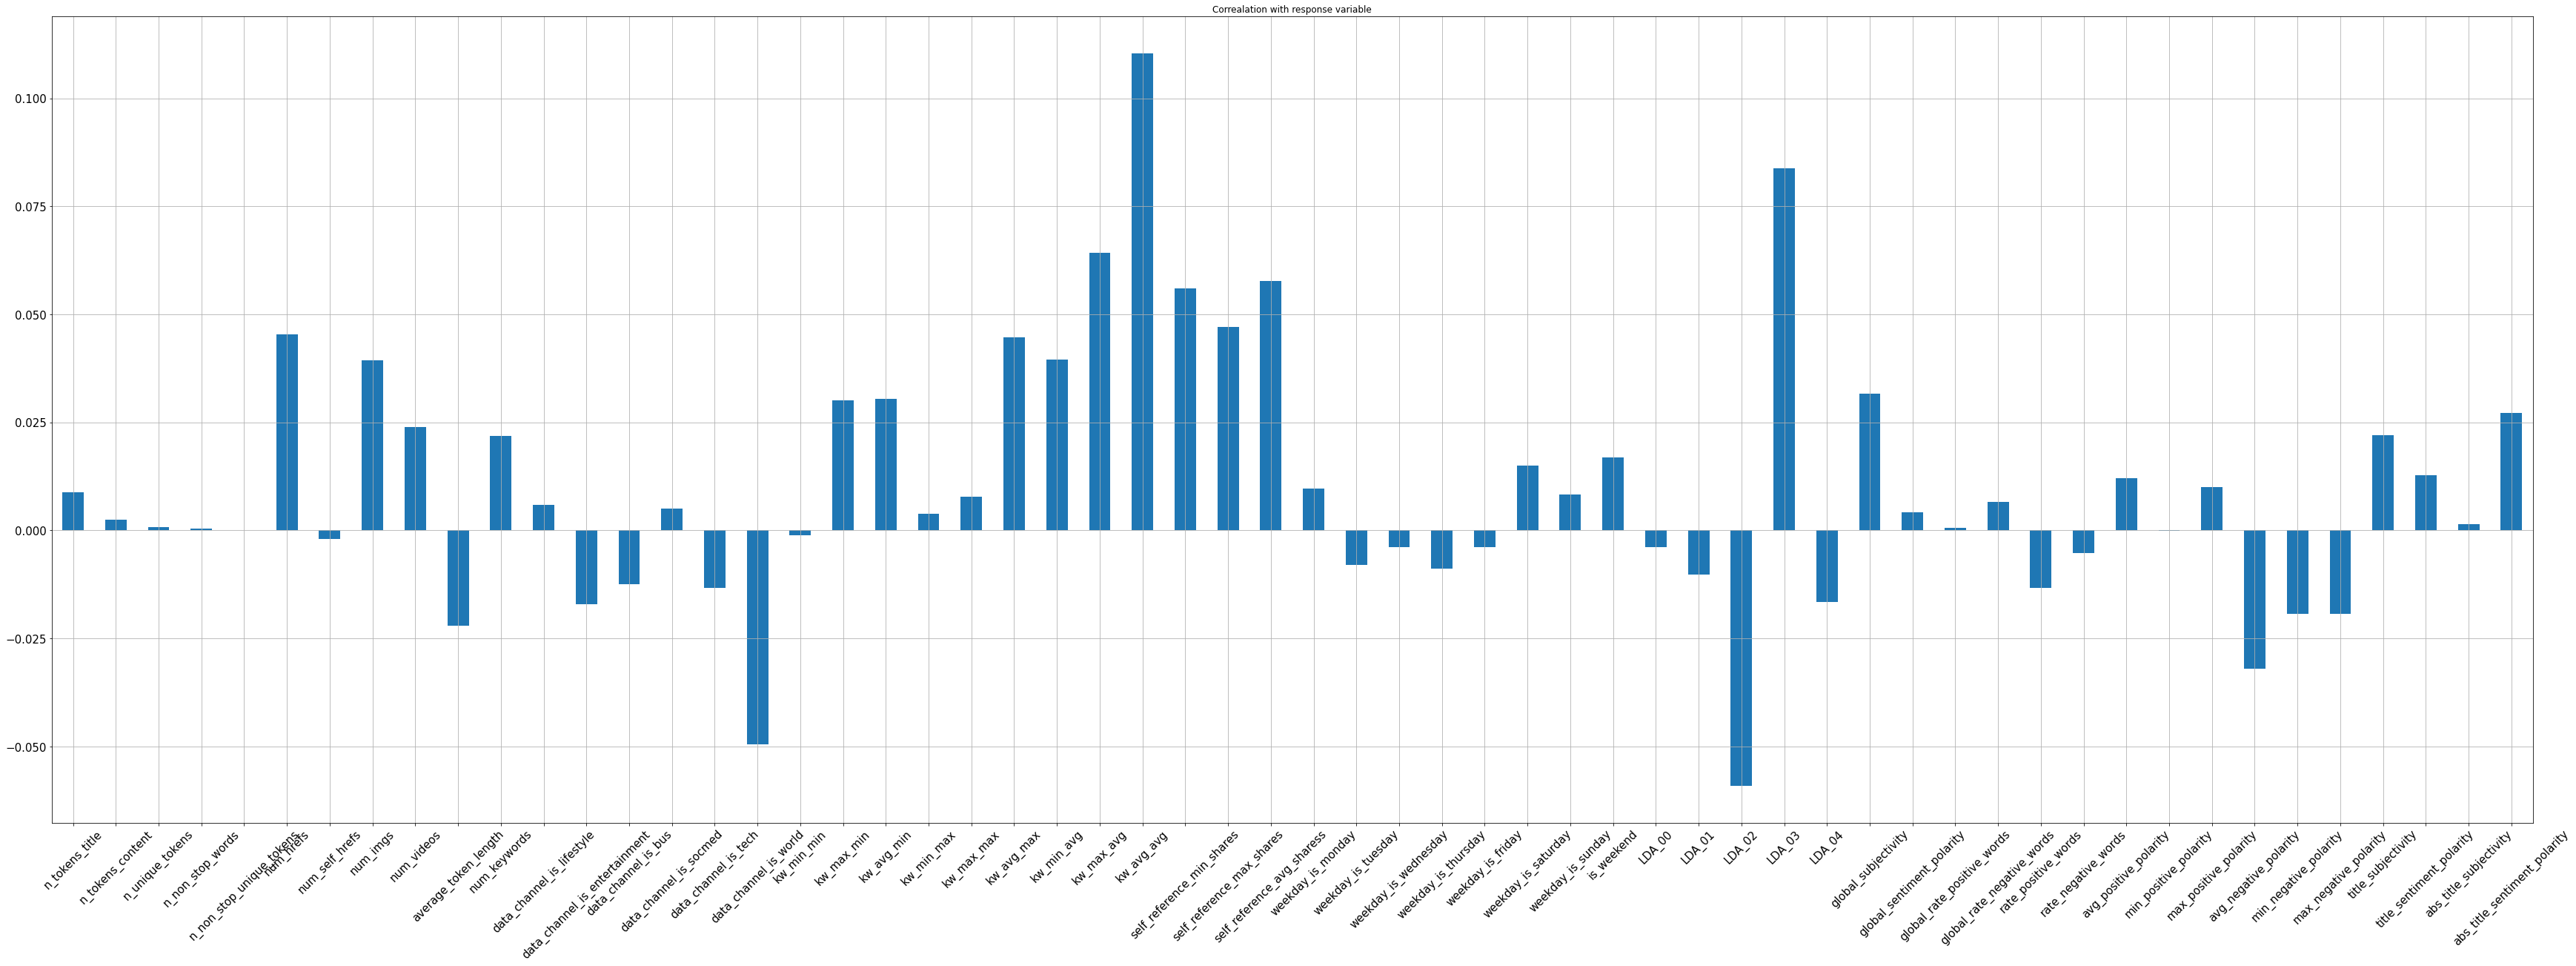

In [12]:
feature_data.corrwith(target_data).plot.bar(figsize=(60,20),title="Correalation with response variable",fontsize=15,rot=45,grid=True)

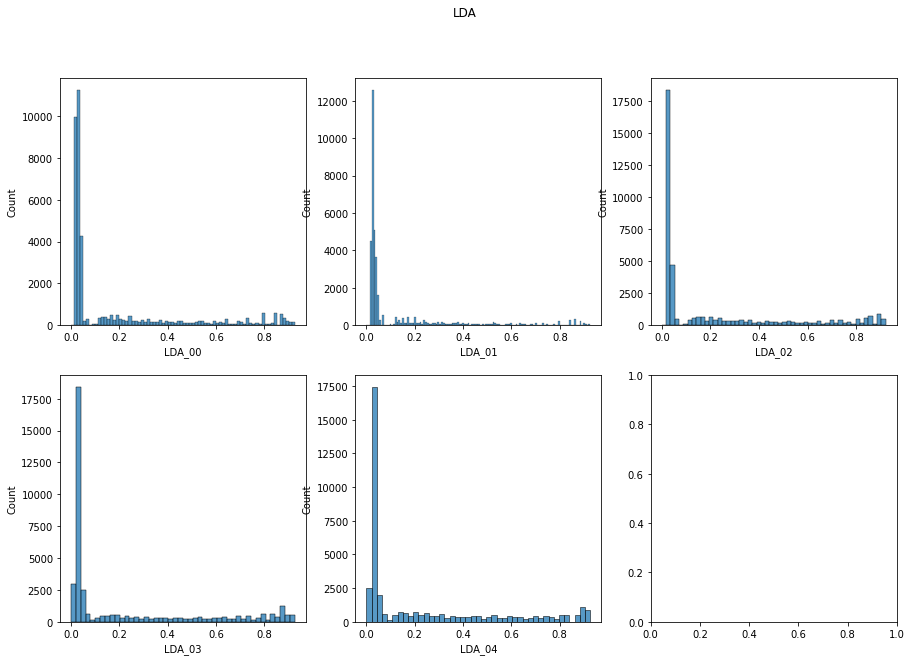

In [25]:
fig, axs = plt.subplots(2, 3)
fig.suptitle('LDA')
fig.set_figheight(10)
fig.set_figwidth(15)
sns.histplot(data=df, x="LDA_00", kde=False,ax=axs[0, 0])
sns.histplot(data=df, x="LDA_01", kde=False,ax=axs[0, 1])
sns.histplot(data=df, x="LDA_02", kde=False,ax=axs[0, 2])
sns.histplot(data=df, x="LDA_03", kde=False,ax=axs[1, 0])
sns.histplot(data=df, x="LDA_04", kde=False,ax=axs[1, 1])
plt.show()